In [1]:
import pandas as pd
data = pd.read_excel('Final_Dataset_excel.xlsx', engine='openpyxl')

data = data[['code', 'ham/spam', 'message']]

data.head(-1)

,code,ham/spam,message
0,1.0,ham,004645 is SECRET OTP for txn of INR 11893.00 o...
1,1.0,ham,133355 is your OTP for conﬁrmation. Regards AP...
2,1.0,ham,223316 is your OTP for conﬁrmation. Regards AP...
3,1.0,ham,237222 is your OTP for conﬁrmation. Regards AP...
4,1.0,ham,269220 is SECRET OTP for txn of INR 11893.00 o...
...,...,...,...
3887,1.0,spam,"Hi Patron, it's the Final Call to shop at the ..."
3888,1.0,spam,"Dear Member, Shop for WROGN worth Rs6999 & GET..."
3889,1.0,spam,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...
3890,1.0,spam,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n..."


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")

model = AutoModelForSequenceClassification.from_pretrained("papluca/xlm-roberta-base-language-detection")

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

In [7]:
import torch
inputs = tokenizer("UMANG ऐप https://web.umang.gov.in/uaw/i/v/ref पर डाउनलोड करें और एक ही ऐप में ढेरों सरकारी सेवाओं का लाभ उठायें|", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
label = model.config.id2label[predicted_class_id]
print(label)

hi


In [8]:
!pip install inltk

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=5e2d706bc512f6eca9d5e511ae25b479227672bdf4c7a985633fbe983c540125
  Stored in directory: c:\users\sarangs\appdata\local\pip\cache\wheels\df\99\da\c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=faa7283aa2197b89ec54d2e208540057143e5864679802fcd2d4ad6603083ef1
  Stored in directory: c:\users\sarangs\appdata\local\pip\cache\wheels\35\f3\15\01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built nvidia-ml-py3 typing
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
  Attempting uninstall: click
    Found existing installation: click 8.1.2
    Uninstalling click-8.1.2:
      Successfully uninstalled click-8.1.2


In [5]:
from inltk.inltk import setup
setup('hi')

from inltk.inltk import identify_language
identify_language('UMANG ऐप https://web.umang.gov.in/uaw/i/v/ref पर डाउनलोड करें और एक ही ऐप में ढेरों सरकारी सेवाओं का लाभ उठायें|')

TypeError: Plain typing.NoReturn is not valid as type argument

In [7]:
!pip install lingua-language-detector

ERROR: Could not find a version that satisfies the requirement lingua-language-detector (from versions: none)
ERROR: No matching distribution found for lingua-language-detector


In [25]:
import pandas as pd
data = pd.read_excel('Final_Labelled_Data.xlsx', engine='openpyxl')

data.head(-1)

,code,ham/spam,message,language,translated_text,otp_transactions_other
0,1.0,ham,004645 is SECRET OTP for txn of INR 11893.00 o...,english,004645 is SECRET OTP for txn of INR 11893.00 o...,OTP
1,1.0,ham,133355 is your OTP for conﬁrmation. Regards AP...,english,133355 is your OTP for conﬁrmation. Regards AP...,OTP
2,1.0,ham,223316 is your OTP for conﬁrmation. Regards AP...,english,223316 is your OTP for conﬁrmation. Regards AP...,OTP
3,1.0,ham,237222 is your OTP for conﬁrmation. Regards AP...,english,237222 is your OTP for conﬁrmation. Regards AP...,OTP
4,1.0,ham,269220 is SECRET OTP for txn of INR 11893.00 o...,english,269220 is SECRET OTP for txn of INR 11893.00 o...,OTP
...,...,...,...,...,...,...
3887,1.0,spam,"Hi Patron, it's the Final Call to shop at the ...",english,"Hi Patron, it's the Final Call to shop at the ...",other
3888,1.0,spam,"Dear Member, Shop for WROGN worth Rs6999 & GET...",english,"Dear Member, Shop for WROGN worth Rs6999 & GET...",other
3889,1.0,spam,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,english,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,other
3890,1.0,spam,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",english,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",other


In [26]:
otp_transactions = []

transaction_words = ['debit', 'credit',
                    'txn', 'bank',
                    'debited', 'credited', 'a/c', 'withdrawn', 'upi','atm', 'transferred', 'withdrawal',
                    'cash withdrawal', 'transaction']
otp_words = ['otp', 'verification code', 'one time password', 'use code', 'login code', 'code' , 'The code', 
             'whatsapp code']
delivery_words = ['shipped', 'delivered', 'track id', 'shipment', 'shipment id', 'ready to ship', 'tracking id', 
                  'order', 'picked', 'out for delivery', 'packed', 'placed', 'ready to ship', 'out for pickup', 
                  'confimed', 'arriving', 'dispatched']

for index, row in data.iterrows():
    text = row['translated_text']
    text = text.lower()
    if row['language'] == 'english' or row['language'] == 'telugu' or row['language'] == 'hindi':
        if any(wo in text for wo in transaction_words):
            otp_transactions.append('transaction')
            
        elif any(wo in text for wo in otp_words):
            otp_transactions.append('OTP')
            
        elif any(wo in text for wo in delivery_words):
            otp_transactions.append('delivery')
            
        else:
            otp_transactions.append('personal')
    else:
            otp_transactions.append('personal')
        
data['otp_transactions_other_new'] = otp_transactions

data.head(-1)

,code,ham/spam,message,language,translated_text,otp_transactions_other,otp_transactions_other_new
0,1.0,ham,004645 is SECRET OTP for txn of INR 11893.00 o...,english,004645 is SECRET OTP for txn of INR 11893.00 o...,OTP,transaction
1,1.0,ham,133355 is your OTP for conﬁrmation. Regards AP...,english,133355 is your OTP for conﬁrmation. Regards AP...,OTP,OTP
2,1.0,ham,223316 is your OTP for conﬁrmation. Regards AP...,english,223316 is your OTP for conﬁrmation. Regards AP...,OTP,OTP
3,1.0,ham,237222 is your OTP for conﬁrmation. Regards AP...,english,237222 is your OTP for conﬁrmation. Regards AP...,OTP,OTP
4,1.0,ham,269220 is SECRET OTP for txn of INR 11893.00 o...,english,269220 is SECRET OTP for txn of INR 11893.00 o...,OTP,transaction
...,...,...,...,...,...,...,...
3887,1.0,spam,"Hi Patron, it's the Final Call to shop at the ...",english,"Hi Patron, it's the Final Call to shop at the ...",other,transaction
3888,1.0,spam,"Dear Member, Shop for WROGN worth Rs6999 & GET...",english,"Dear Member, Shop for WROGN worth Rs6999 & GET...",other,personal
3889,1.0,spam,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,english,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,other,personal
3890,1.0,spam,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",english,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",other,personal


In [27]:
data.to_excel('Final_Labelled_Data_new.xlsx', index=False)

In [28]:
data1 = data[data['ham/spam'] == 'ham']
data1.to_excel('Final_Labelled_Data_new_ham.xlsx', index=False)

In [21]:
data['otp_transactions_other'].value_counts()

other          2748
transaction     934
OTP             211
Name: otp_transactions_other, dtype: int64

In [4]:
data['otp_transactions_other_new'].value_counts()

other          2732
transaction     950
OTP             211
Name: otp_transactions_other_new, dtype: int64

In [13]:
transaction = data[data['otp_transactions_other']== 'transaction']
transaction.head(-1)

,code,ham/spam,message,language,translated_text,otp_transactions_other
7,1.0,spam,"3 of our best offers for you, Bhanu! Extra Tee...",english,"3 of our best offers for you, Bhanu! Extra Tee...",transaction
19,1.0,spam,70% Usage Alert! You have consumed 70% of your...,english,70% Usage Alert! You have consumed 70% of your...,transaction
29,1.0,spam,All about pursuing MS/MBA from the best Univer...,english,All about pursuing MS/MBA from the best Univer...,transaction
30,1.0,spam,"At home? Watch 400+ LIVE TV channels,10k+ movi...",english,"At home? Watch 400+ LIVE TV channels,10k+ movi...",transaction
31,1.0,ham,Available Bal in HDFC Bank A/c XX4018 on 03-DE...,english,Available Bal in HDFC Bank A/c XX4018 on 03-DE...,transaction
...,...,...,...,...,...,...
3887,1.0,spam,"Hi Patron, it's the Final Call to shop at the ...",english,"Hi Patron, it's the Final Call to shop at the ...",transaction
3888,1.0,spam,"Dear Member, Shop for WROGN worth Rs6999 & GET...",english,"Dear Member, Shop for WROGN worth Rs6999 & GET...",transaction
3889,1.0,spam,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,english,Lenskart Mega Sale: Get 40% Off plus Buy1Get1 ...,transaction
3890,1.0,spam,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",english,"Bodapatiabhiteja, get EXTRA Rs.300 Off today\n...",transaction


In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

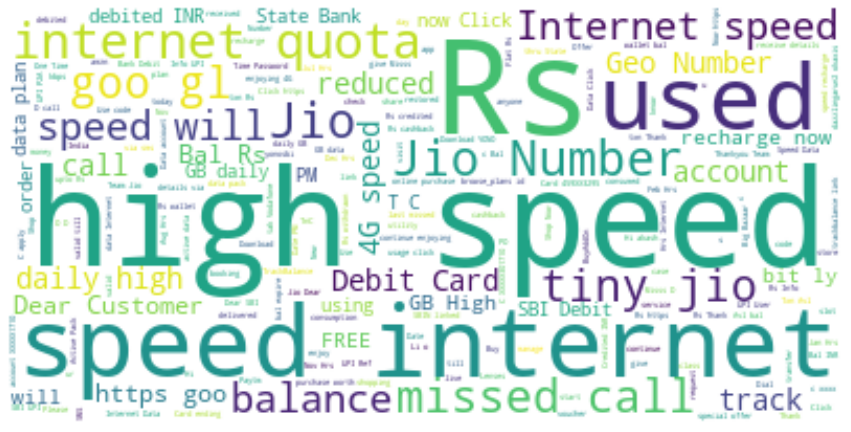

In [15]:
text = " ".join(i for i in transaction.translated_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
data.to_excel('test.xlsx', index=False)

In [7]:
transaction = data[data['otp_transactions_other_new']== 'transaction']
transaction.head(-1)

,code,ham/spam,message,language,translated_text,otp_transactions_other,otp_transactions_other_new
31,1.0,ham,Available Bal in HDFC Bank A/c XX4018 on 03-DE...,english,Available Bal in HDFC Bank A/c XX4018 on 03-DE...,other,transaction
32,1.0,spam,"Bhanu, 3 awesome deals for you Rs.500 credited...",english,"Bhanu, 3 awesome deals for you Rs.500 credited...",transaction,transaction
45,1.0,spam,"Bhanu, Rs.300 credited to your account Also, g...",english,"Bhanu, Rs.300 credited to your account Also, g...",transaction,transaction
46,1.0,spam,"Bhanu, Rs.500 credited to your account Also, g...",english,"Bhanu, Rs.500 credited to your account Also, g...",transaction,transaction
47,1.0,spam,"Bhanu, Rs.500 credited to your account Also, g...",english,"Bhanu, Rs.500 credited to your account Also, g...",transaction,transaction
...,...,...,...,...,...,...,...
3869,1.0,ham,"Dear SBI UPI User, your account is debited INR...",english,"Dear SBI UPI User, your account is debited INR...",transaction,transaction
3872,4.0,ham,నాటికి 50% రోజువారీ డేటా కోటా ఉపయోగించబడింది.\...,telugu,By 50% daily data quota was used.\nGeo Number:...,transaction,transaction
3873,4.0,ham,"మీకు ఇతర డేటా ప్లాన్ లేకపోతే, 2 GB డేటా కోటా వ...",telugu,"If you do not have other data plan, 2 GB data ...",transaction,transaction
3881,1.0,ham,BOOKMYSHOW has requested money from you on you...,english,BOOKMYSHOW has requested money from you on you...,transaction,transaction


In [8]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

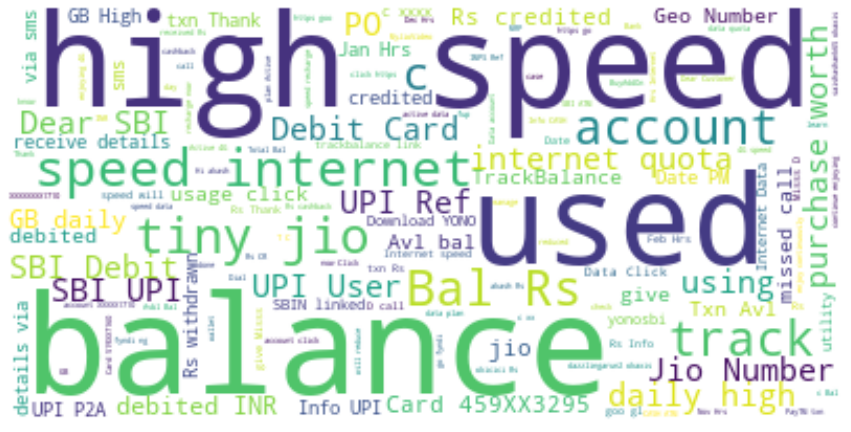

In [9]:
text = " ".join(i for i in transaction.translated_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()